### <font color='green'>**Tarea 2** </font>

1. (0.5) Cargue de la base de datos *Noticias.csv* los primeros 200 reportes.
2. (0.5) Cambie el nombre de las columnas a $Nit$, $ID$, $URL$, $Fecha\ Inicial$, $Fecha\ Final$.
3. (0.5) Eliminar el $news$ de la columna $ID$.
4. (0.5) Organice las fechas para que queden en un formato $DD/MM/AAAA$.
5. (1.0) Cree un nueva columna con la duración por días de cada noticia.
6. (1.0) Cree una columna para el nombre de la revista y otra para el dominio. Llénelas como corresponde.
7. (0.5) Organice las columnas en el orden $Nit$, $ID$, $Revista$, $Dominio$, $Fecha\ Inicial$, $Fecha\ Final$, $Duración$, $URL$.
8. (1.0) Cree una tabla con noticias que tengan un dominio que no pertenece a ningún país y que inicien en julio y terminen en agosto.
9. (0.5) Cree un archivo Excel donde guarde la información en diferentes hojas según cada revista.

**Nota Final:** 6.0

***Ayuda 1:*** Puede que le sean útiles los atributos $columns$ y $loc$.  
***Ayuda 2:*** Puede que necesite crear su propias funciones.    
***Ayuda 3:*** Puede que le sea útil el método $apply$.   
***Ayuda 4:*** Puede que le sea útil el método $datetime$ de la librería $datetime$. Consulte.    
***Ayuda 5:*** Puede que le sean útiles los ciclos $for$.  
***Ayuda 6:*** Puede que le sean útiles los métodos de los Strings.  
***Ayuda 7:*** Recuerde los métodos $groupby$, $get\_group$ y $ExcelWriter$.   
***Ayuda 8:*** Hay 13 revistas diferentes.   
***Ayuda 9:*** Hay 7 dominios diferentes.   

1. Cargue de la base de datos *Noticias.csv* los primeros 200 reportes.

In [1]:
from datetime import datetime
import pandas as pd

In [2]:
df = pd.read_csv('../Datos/Noticias.csv')
df = df.loc[:199, :]
df.head(5)

,nit,news_id,news_url_absolute,news_init_date,news_final_date
0,900378212,news10006,https://www.bluradio.com/economia/precio-dolar...,2022-07-30,2022-08-14
1,900378212,news10011,https://www.semana.com/economia/macroeconomia/...,2022-07-30,2022-08-14
2,860034313,news10011,https://www.semana.com/economia/macroeconomia/...,2022-07-30,2022-08-14
3,900378212,news10015,https://elcomercio.pe/respuestas/que/gustavo-p...,2022-07-30,2022-08-14
4,900166896,news10015,https://elcomercio.pe/respuestas/que/gustavo-p...,2022-07-30,2022-08-14


In [3]:
#df = df.head(200)
#df = pd.read_csv('Noticias.csv', nrows=200)

2. Cambie el nombre de las columnas a $Nit$, $ID$, $URL$, $Fecha\ Inicial$, $Fecha\ Final$.

In [4]:
df.columns = ['Nit','ID','URL','Fecha Inicial', 'Fecha Final']

3. Eliminar el $news$ de la columna $ID$.

In [5]:
df.loc[:,'ID'] = df.loc[:,'ID'].str.replace('news','')

In [6]:
#def quitar_news(palabra): return palabra.replace('news','')
#df.loc[:,'ID'] = df.loc[:,'ID'].apply(quitar_news)

4. Organice las fechas para que queden en un formato $DD/MM/AAAA$.

In [7]:
def fecha_DDMMAAAA(fecha):
    fecha = fecha.split('-') #2022-07-30 --> [2022,07,30]
    fecha = fecha[2]+'/'+fecha[1]+'/'+fecha[0]
    return fecha

In [8]:
df.loc[:,'Fecha Inicial'] = df.loc[:,'Fecha Inicial'].apply(fecha_DDMMAAAA)
df.loc[:,'Fecha Final'] = df.loc[:,'Fecha Final'].apply(fecha_DDMMAAAA)

In [9]:
#df['Fecha Inicial'] = pd.to_datetime(df['Fecha Inicial']).dt.strftime('%d/%m/%Y')
#df['Fecha Final'] = pd.to_datetime(df['Fecha Final']).dt.strftime('%d/%m/%Y') 
#df.head(5)

5. Cree un nueva columna con la duración por días de cada noticia.

In [10]:
def fecha_dias(fecha_1,fecha_2):
    fecha_1 = datetime.strptime(fecha_1,'%d/%m/%Y') #'%d/%m/%Y' - '%Y/%m/%d'
    fecha_2 = datetime.strptime(fecha_2,'%d/%m/%Y')
    dias = (fecha_2-fecha_1).days
    return dias

In [11]:
df.loc[:,'Duración'] = [fecha_dias(df.loc[i,'Fecha Inicial'],df.loc[i,'Fecha Final']) for i in range(df.shape[0])]

In [12]:
#df.loc[:, 'Duración'] = pd.to_datetime(df.loc[:, 'Fecha Final']) - pd.to_datetime(df.loc[:, 'Fecha Inicial'])
#df

6. Cree una columna para el nombre de la revista y otra para la extrensión de dominio. Llénelas como corresponde.

In [13]:
def revista_dominio(url):
    url = url.split('/')[2] #www.bluradio.com
    url = url.split('.') #['www','bluradio','com'] - ['elcomercio','pe'] - ['www','laopinion','com','co'] - ['laopinion','com','co']
    revista = max(url, key=len) #'bluradio' (abs, bbc, 123)
    dominio = url[-1] #'com'
    return revista,dominio

In [14]:
#url = 'https://www.bluradio.com/economia/precio-dolar'
 
#print(url.split('/'))    
#print(url.split('/')[2])
#url = url.split('/')[2]
#print(url.split('.'))

In [15]:
i = 0
for url in df.loc[:,'URL']:
    revista, dominio = revista_dominio(url)
    df.loc[i,'Revista'] = revista.title()
    df.loc[i,'Dominio'] = dominio
    i = i+1

7. Organice las columnas en el orden $Nit$, $ID$, $Revista$, $Dominio$, $Fecha\ Inicial$, $Fecha\ Final$, $Duración$, $URL$.

In [16]:
df = df.loc[:, ['Nit','ID','Revista','Dominio','Fecha Inicial','Fecha Final','Duración','URL']]

8. Cree una tabla con noticias que tengan un dominio que no pertenece a ningún país y que inicien en julio y terminen en agosto.

In [17]:
cond1 = df.loc[:, 'Dominio'] == 'com'
cond2 = (df.loc[:, 'Fecha Inicial'].str.contains('/07/')) & (df.loc[:, 'Fecha Final'].str.contains('/08/'))
cond = cond1 & cond2
df3 = df.loc[cond, :]

9. Cree un archivo Excel donde guarde la información en diferentes hojas según cada revista.

In [18]:
df1 = df.groupby(['Revista'])
archivo = pd.ExcelWriter('../Datos/Revistas.xlsx')
nombres = list(set(df.loc[:, 'Revista']))

for nombre in nombres:
    df2 = df1.get_group(nombre)
    df2.to_excel(archivo, sheet_name=nombre, index=False)

archivo.close()

Visualización Final:

In [19]:
df

,Nit,ID,Revista,Dominio,Fecha Inicial,Fecha Final,Duración,URL
0,900378212,10006,Bluradio,com,30/07/2022,14/08/2022,15,https://www.bluradio.com/economia/precio-dolar...
1,900378212,10011,Semana,com,30/07/2022,14/08/2022,15,https://www.semana.com/economia/macroeconomia/...
2,860034313,10011,Semana,com,30/07/2022,14/08/2022,15,https://www.semana.com/economia/macroeconomia/...
3,900378212,10015,Elcomercio,pe,30/07/2022,14/08/2022,15,https://elcomercio.pe/respuestas/que/gustavo-p...
4,900166896,10015,Elcomercio,pe,30/07/2022,14/08/2022,15,https://elcomercio.pe/respuestas/que/gustavo-p...
...,...,...,...,...,...,...,...,...
195,860090915,10112,Bnamericas,com,15/07/2022,30/07/2022,15,https://www.bnamericas.com/es/noticias/ecuador...
196,890300431,10112,Bnamericas,com,15/07/2022,30/07/2022,15,https://www.bnamericas.com/es/noticias/ecuador...
197,860051135,10115,Eldiarioar,com,15/07/2022,30/07/2022,15,https://www.eldiarioar.com/economia/washington...
198,900628110,10116,Laopinion,co,30/07/2022,14/08/2022,15,https://www.laopinion.com.co/politica/11-jefes...


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

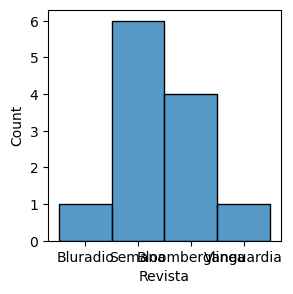

In [21]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.histplot(data=df3, x='Revista')
plt.show()

In [22]:
fig.savefig('../Figuras/Figura_1.pdf')